# Terrorism in Turkey
1970-2020 datas

Reference:

-[A Glance of Terrorism in Turkey-Global Terrorism Database-Idris Guclu](https://www.kaggle.com/code/idrisguclu/a-glance-of-terrorism-in-turkey/notebook) 

-[The Effects of Terrorism on Voting Behavior in Turkey](https://research.sabanciuniv.edu/id/eprint/16485/1/Funerals_and_Elections_2.pdf)

-[Global Terrorism Data Visualization](https://www.kaggle.com/code/narimanalakbarli/global-terrorism-data-visualization)

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 

In [91]:
#import libraries
import math
import warnings
import numpy as np
import pandas as pd
import geopandas
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.patches
warnings.filterwarnings('ignore')



In [17]:
#Load Data "Global Terrorism"

df1 = pd.read_csv("global_terrorism.csv",encoding='ISO-8859-1')

we try to learn our data 

In [3]:
df1.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df1.shape

(201183, 135)

In [7]:
#rename some columns with more meaningful 
df1.rename(columns={'eventid':'EventId','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','city': 'City','latitude':'Latitude','longitude':'Longitude','success':'Success','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [12]:
#we pull the data we want to use
df2=pd.DataFrame(df1, columns=['EventId','Year','Month','Day','Country','Region','City','Latitude','Longitude','Success','AttackType','Target','Target_type','Killed','Wounded','Group','Weapon_type'])

In [13]:
df2.isnull().sum() #null values

EventId            0
Year               0
Month              0
Day                0
Country            0
Region             0
City             426
Latitude        4627
Longitude       4628
Success            0
AttackType         0
Target           635
Target_type        0
Killed         11950
Wounded        18924
Group              0
Weapon_type        0
dtype: int64

# Data Frame of Turkey  

In [14]:
df_turkey=df2[df2["Country"] == 'Turkey']

In [15]:
df_turkey.shape

(4464, 17)

In [16]:
df_turkey.head()

EventId  Year  Month  Day Country                      Region  \
226  197004250001  1970      4   25  Turkey  Middle East & North Africa   
486  197008310001  1970      8   31  Turkey  Middle East & North Africa   
531  197010020002  1970     10    2  Turkey  Middle East & North Africa   
534  197010030001  1970     10    3  Turkey  Middle East & North Africa   
535  197010030002  1970     10    3  Turkey  Middle East & North Africa   

         City   Latitude  Longitude  Success         AttackType  \
226  Istanbul  41.106178  28.689863        1  Bombing/Explosion   
486    Ankara  39.930771  32.767540        1  Bombing/Explosion   
531     Izmir  38.395649  27.135641        1  Bombing/Explosion   
534    Ankara  39.930771  32.767540        1  Bombing/Explosion   
535    Ankara  39.930771  32.767540        1  Bombing/Explosion   

                           Target              Target_type  Killed  Wounded  \
226                  EL AL Office      Airports & Aircraft     0.0      0.0   
486    TUSLOG Detachment 30, USAF                 Military     0.0      0.0   
531     U.S. Air Force Commissary                 Military     0.0      0.0   
534                   USIS Office  Government (Diplomatic)     NaN      NaN   
535  building, U.S. Element Cento                 Business     0.0      0.0   

                                                Group Weapon_type  
226                                      Palestinians  Explosives  
486                  Turkish People's Liberation Army  Explosives  
531  Turkish People's Liberation Front (TPLF)(THKP-C)  Explosives  
534                                           Unknown  Explosives  
535                  Turkish People's Liberation Army  Explosives

# Terorist groups

In [20]:
#Most active terorist groups in Turkey and total attacks since 1970
group=df_turkey.Group.value_counts()
group.head()

Kurdistan Workers' Party (PKK)                 2234
Unknown                                        1448
Dev Sol                                         236
Islamic State of Iraq and the Levant (ISIL)      82
Turkish People's Liberation Army                 69
Name: Group, dtype: int64

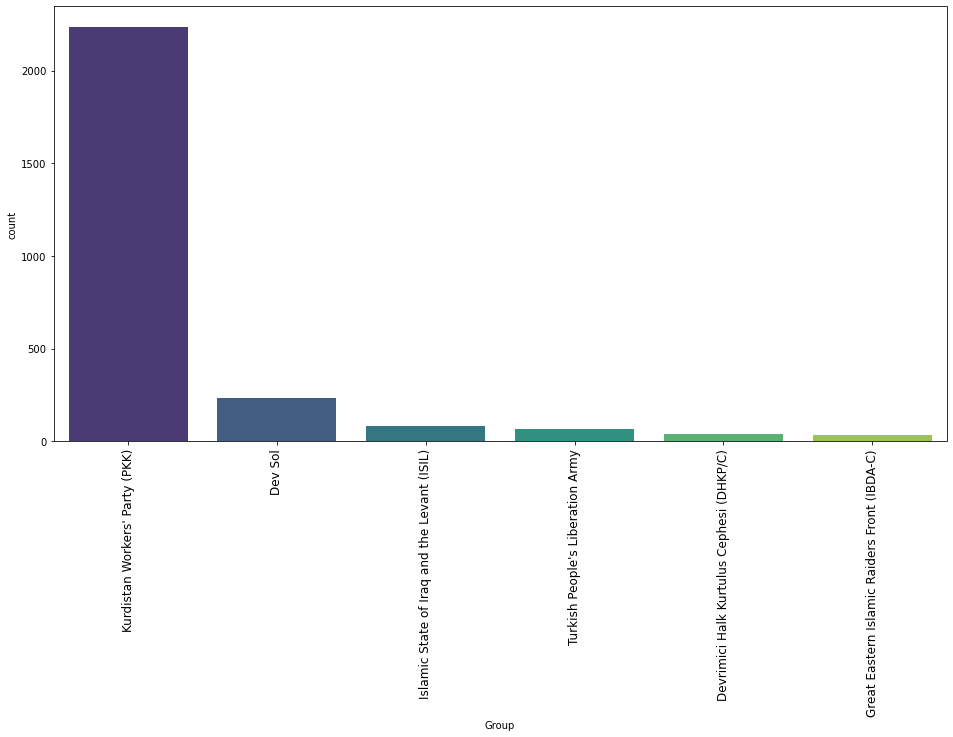

<Figure size 432x288 with 0 Axes>

In [29]:
groups = df_turkey["Group"].value_counts().drop("Unknown").index[:6]
groups = df_turkey[df_turkey["Group"].isin(groups)]
plt.subplots(figsize=(16,8))
sns.countplot("Group",data=groups,order=groups.Group.value_counts().index,palette="viridis")
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.show()
plt.savefig('group.png')

# Weapon Types

In [22]:
#Most used weapon types in Turkey for terrorism
Weapon_type=df_turkey.Weapon_type.value_counts()
Weapon_type.head()

Explosives    2164
Firearms      1619
Unknown        319
Incendiary     309
Melee           48
Name: Weapon_type, dtype: int64

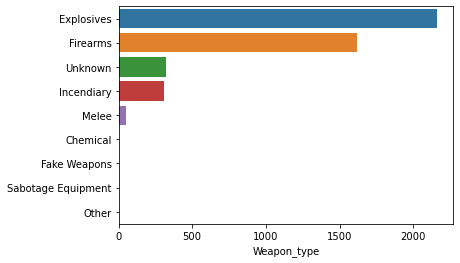

In [28]:
sns.barplot(x=df_turkey.Weapon_type.value_counts(), y=df_turkey.Weapon_type.value_counts().index,
            order = df_turkey.Weapon_type.value_counts().iloc[:25].index, orient="h")

plt.savefig('Weapon.png')



# Attack Types 

In [23]:
AttackType= df_turkey.AttackType.value_counts()
AttackType.head()

Bombing/Explosion                 2058
Armed Assault                     1319
Assassination                      440
Facility/Infrastructure Attack     291
Hostage Taking (Kidnapping)        165
Name: AttackType, dtype: int64

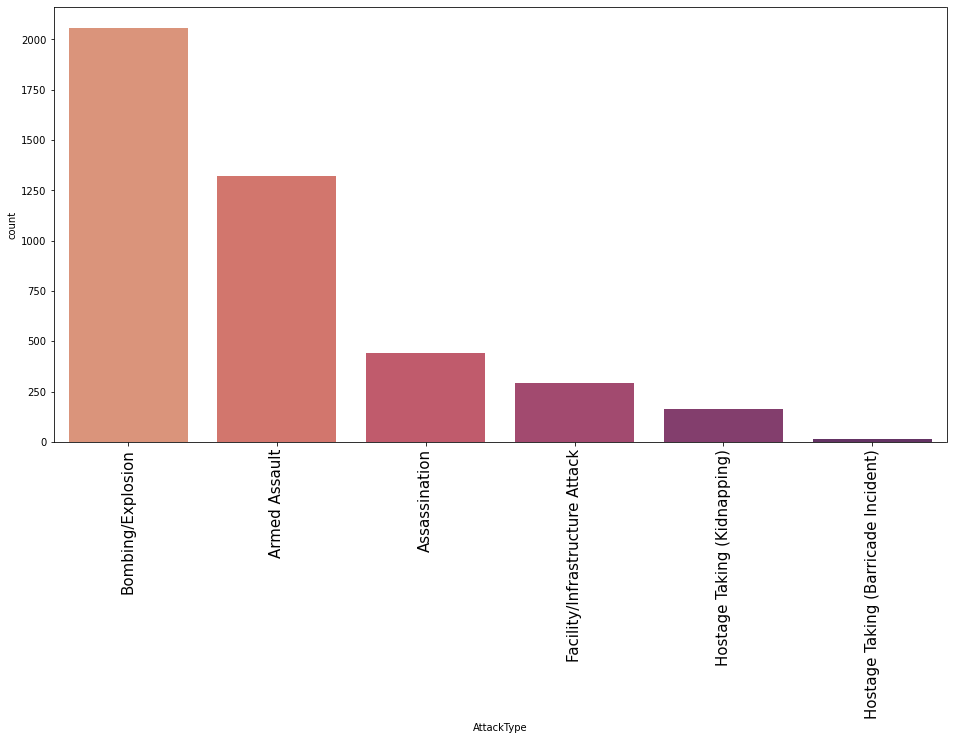

<Figure size 432x288 with 0 Axes>

In [24]:
attacks= df_turkey["AttackType"].value_counts().drop("Unknown").index[:6]
attacks= df_turkey[df_turkey["AttackType"].isin(attacks)]
plt.subplots(figsize=(16,8))
sns.countplot("AttackType",data=attacks,order=attacks.AttackType.value_counts().index,palette="flare")
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.show()
# Save the image in the img folder:
plt.savefig('attack.png')

# Total Terrorist Activity by Cities

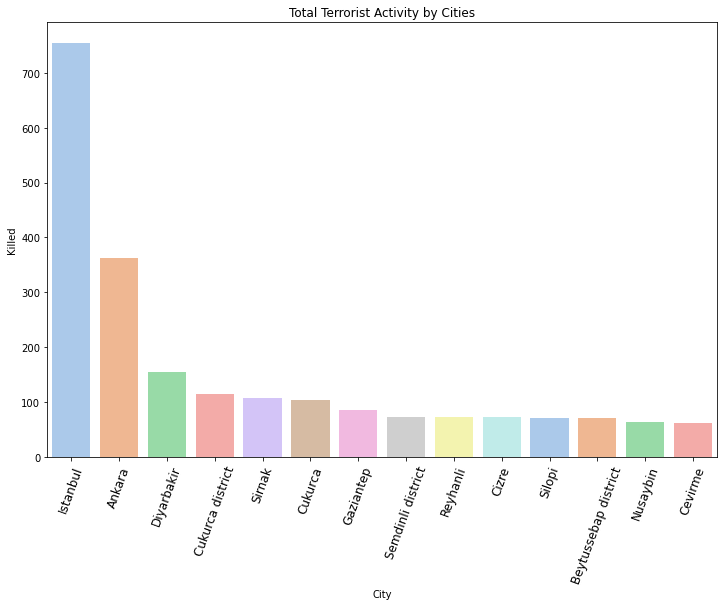

<Figure size 432x288 with 0 Axes>

In [33]:
most_citites=df_turkey.groupby("City")["Killed"].sum().to_frame()
most_citites=most_citites.sort_values("Killed",ascending=False)[1:15]
plt.subplots(figsize=(12,8))
sns.barplot(most_citites.index,most_citites.Killed,palette="pastel")
plt.title("Total Terrorist Activity by Cities")
plt.xticks(rotation=70)
plt.xticks(fontsize=12)
plt.show()
# Save the image in the img folder:
plt.savefig('city.png')

# Number of Terrorist Activities Each Year in Istanbul

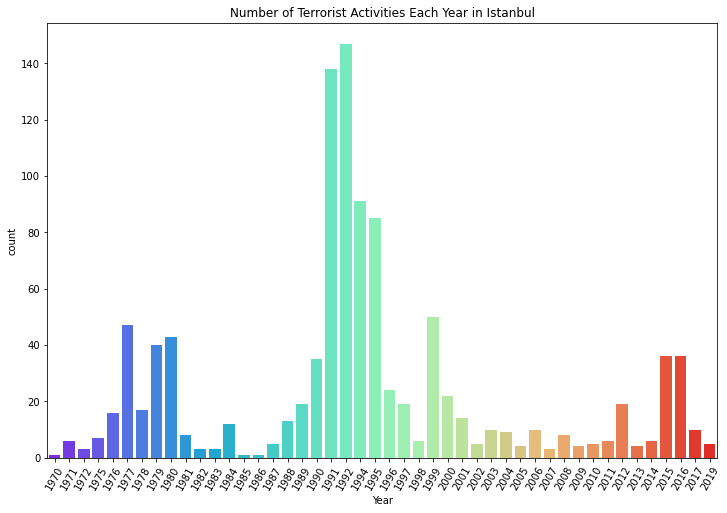

In [34]:
Ist_data = df_turkey[df_turkey["City"]=="Istanbul"]

plt.subplots(figsize=(12,8))
sns.countplot("Year",data=Ist_data,palette="rainbow")
plt.xticks(rotation=60)
plt.title("Number of Terrorist Activities Each Year in Istanbul")
# Save the image in the img folder:
plt.savefig('istanbul.png')

# Number Of Terrorist Activities by Year

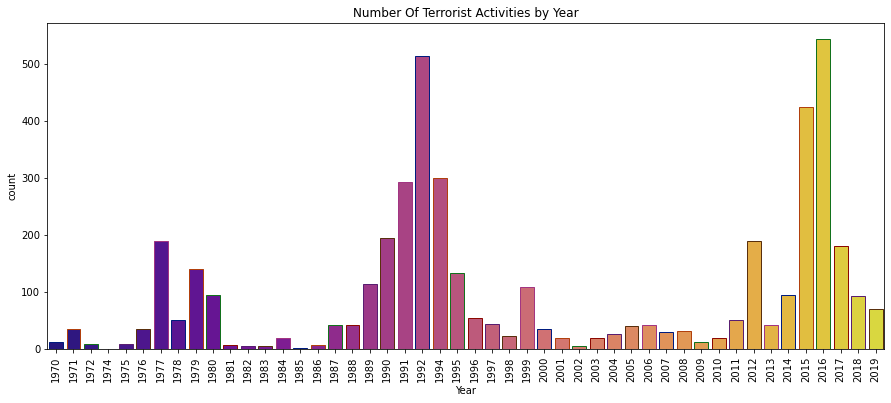

<Figure size 432x288 with 0 Axes>

In [35]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df_turkey,palette='plasma',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities by Year')
plt.show()
# Save the image in the img folder:
plt.savefig('years.png')

# Some Basic Analysis¶

In [44]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('City with Highest Terrorist Attacks in Turkey :',df_turkey['City'].value_counts().index[0])
print('Maximum people killed in an attack are:',df_turkey['Killed'].max(),'that took place in',df_turkey.loc[df_turkey['Killed'].idxmax()].Country)
print("Year with the most attacks:",df_turkey['Year'].value_counts().idxmax())
print("Month with the most attacks in Turkey :",df_turkey['Month'].value_counts().idxmax())
print("Most Attack Types:",df_turkey['AttackType'].value_counts().idxmax())

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
City with Highest Terrorist Attacks in Turkey : Istanbul
Maximum people killed in an attack are: 105.0 that took place in Turkey
Year with the most attacks: 2016
Month with the most attacks in Turkey : 8
Most Attack Types: Bombing/Explosion


In [45]:
print('\nThe other 9 countries with highest terrorist attacks are:')
for i in range(1,10):
    print(f"{i+1}. {df2.Country.value_counts().index[i]} with {df2.Country.value_counts()[i]} attacks")



The other 9 countries with highest terrorist attacks are:
2. Afghanistan with 16313 attacks
3. Pakistan with 15208 attacks
4. India with 13477 attacks
5. Colombia with 8742 attacks
6. Philippines with 7976 attacks
7. Peru with 6109 attacks
8. Yemen with 5526 attacks
9. United Kingdom with 5424 attacks
10. El Salvador with 5320 attacks


## Creating a GeoDataFrame from a DataFrame with coordinates
Spatial Data Analysis

In [58]:
geodf=pd.DataFrame(df2, columns=['Latitude','Longitude','Year','Month','Day','Country','Region','AttackType','Target_type','Group','Weapon_type'])

In [59]:
#We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely
#Point objects and set it as a geometry
gdf = geopandas.GeoDataFrame(
    geodf, geometry=geopandas.points_from_xy(geodf.Longitude, geodf.Latitude))

In [60]:
gdf.head()

Latitude   Longitude  Year  Month  Day             Country  \
0  18.456792  -69.951164  1970      7    2  Dominican Republic   
1  19.371887  -99.086624  1970      0    0              Mexico   
2  15.478598  120.599741  1970      1    0         Philippines   
3  37.997490   23.762728  1970      1    0              Greece   
4  33.580412  130.396361  1970      1    0               Japan   

                        Region                      AttackType  \
0  Central America & Caribbean                   Assassination   
1                North America     Hostage Taking (Kidnapping)   
2               Southeast Asia                   Assassination   
3               Western Europe               Bombing/Explosion   
4                    East Asia  Facility/Infrastructure Attack   

                   Target_type                               Group  \
0  Private Citizens & Property                              MANO-D   
1      Government (Diplomatic)  23rd of September Communist League   
2          Journalists & Media                             Unknown   
3      Government (Diplomatic)                             Unknown   
4      Government (Diplomatic)                             Unknown   

  Weapon_type                    geometry  
0     Unknown  POINT (-69.95116 18.45679)  
1     Unknown  POINT (-99.08662 19.37189)  
2     Unknown  POINT (120.59974 15.47860)  
3  Explosives   POINT (23.76273 37.99749)  
4  Incendiary  POINT (130.39636 33.58041)

# World Terorism Map

In [71]:
for i in range(0, len(df2['Country'])):
    print(f"{i+1}. {df2.Country.value_counts().index[i]} with {df2.Country.value_counts()[i]} attacks")


1. Iraq with 26755 attacks
2. Afghanistan with 16313 attacks
3. Pakistan with 15208 attacks
4. India with 13477 attacks
5. Colombia with 8742 attacks
6. Philippines with 7976 attacks
7. Peru with 6109 attacks
8. Yemen with 5526 attacks
9. United Kingdom with 5424 attacks
10. El Salvador with 5320 attacks
11. Nigeria with 5070 attacks
12. Somalia with 5037 attacks
13. Turkey with 4464 attacks
14. Thailand with 4162 attacks
15. Spain with 3255 attacks
16. Sri Lanka with 3040 attacks
17. United States with 3004 attacks
18. Algeria with 2749 attacks
19. Syria with 2737 attacks
20. France with 2726 attacks
21. West Bank and Gaza Strip with 2608 attacks
22. Egypt with 2597 attacks
23. Lebanon with 2496 attacks
24. Libya with 2488 attacks
25. Chile with 2444 attacks
26. Russia with 2230 attacks
27. Israel with 2136 attacks
28. South Africa with 2080 attacks
29. Guatemala with 2052 attacks
30. Nicaragua with 1980 attacks
31. Ukraine with 1780 attacks
32. Bangladesh with 1714 attacks
33. Italy 

IndexError: index 205 is out of bounds for axis 0 with size 205

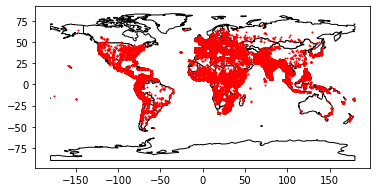

<Figure size 432x288 with 0 Axes>

In [67]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red',markersize=1)
plt.show()
plt.savefig('world.png')

In [68]:
#Geo Data Frame for Turkey
turkey_gdf = geopandas.GeoDataFrame(
    df_turkey, geometry=geopandas.points_from_xy(df_turkey.Longitude, df_turkey.Latitude))

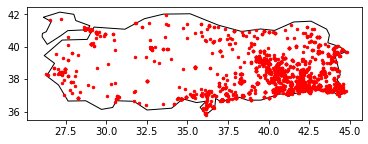

In [69]:
turkey = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = turkey[turkey.name == 'Turkey'].plot(
    color='white', edgecolor='black')#[world.continent == 'South America']

# We can now plot our ``GeoDataFrame``.
turkey_gdf.plot(ax=ax, marker='o', color='red', markersize=6)
plt.show()
#plt.savefig(tr_p.png)

# Number Of Terrorist Activities per Year

In [ ]:
# Number Of Terrorist Activities per Year

<AxesSubplot:title={'center':'Number Of Terrorist Activities per Year'}, xlabel='Year', ylabel='Density'>

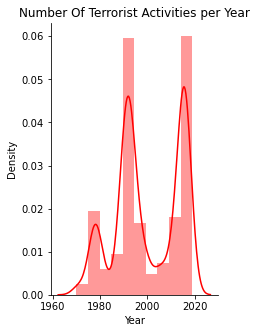

In [73]:
f, ax = plt.subplots(figsize=(3, 5))
plt.title('Number Of Terrorist Activities per Year')
sns.despine(f)
sns.distplot(df_turkey['Year'], bins=10,color="r")

# Terrorist Activities by Region each Year

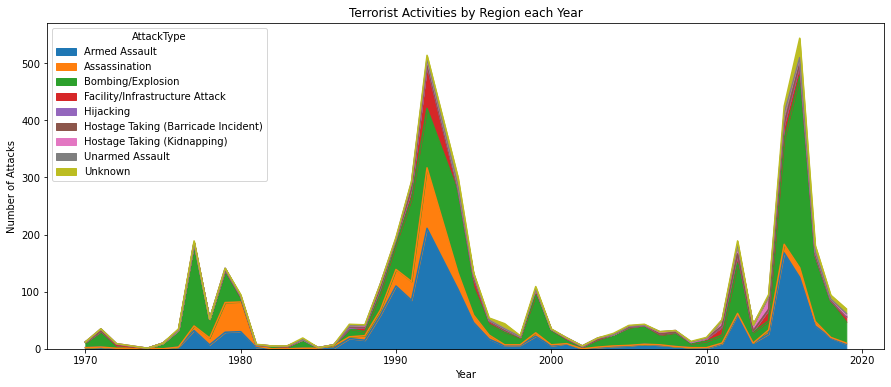

In [78]:
pd.crosstab(df_turkey.Year, df_turkey.AttackType).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region each Year')
plt.ylabel('Number of Attacks')
plt.show()

# World-wide map of Terrorism

In [79]:
#import libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import folium
import folium.plugins
import io
from mpl_toolkits.basemap import Basemap
from matplotlib import animation,rc
import base64

from IPython.display import HTML, display
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [82]:
terror_fol=df_turkey.copy()
terror_fol.dropna(subset=['Latitude','Longitude'],inplace=True)
location_fol=terror_fol[['Latitude','Longitude']][:8000]
year_fol=terror_fol['Year'][:8000]
city_fol=terror_fol['City'][:8000]
killed_fol=terror_fol['Killed'][:8000]
wound_fol=terror_fol['Wounded'][:8000]
def color_point(x):
    if x>=30:
        color='red'
    elif ((x>0 and x<30)):
        color='blue'
    else:
        color='orange'
    return color   
def point_size(x):
    if (x>30 and x<100):
        size=2
    elif (x>=100 and x<500):
        size=8
    elif x>=500:
        size=16
    else:
        size=0.5
    return size   
map2 = folium.Map(location=[30,0],tiles='cartodbpositron',zoom_start=2)
for point in location_fol.index:
    info='<b>Country: </b>'+str(year_fol[point])+'<br><b>City: </b>: '+str(city_fol[point])+'<br><b>Killed </b>: '+str(killed_fol[point])+'<br><b>Wounded</b> : '+str(wound_fol[point])
    iframe = folium.IFrame(html=info, width=200, height=200)
    folium.CircleMarker(list(location_fol.loc[point].values),popup=folium.Popup(iframe),radius=point_size(killed_fol[point]),color=color_point(killed_fol[point])).add_to(map2)
map2

# How did terrorism spread in Turkey

MovieWriter imagemagick unavailable; using Pillow instead.



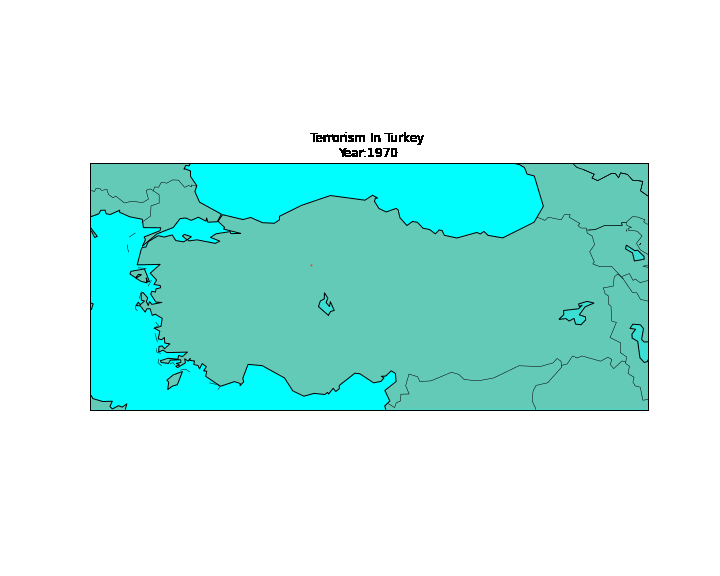

In [83]:
fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In Turkey '+'\n'+'Year:' +str(Year))
    m5 = Basemap(projection='lcc',resolution='l',llcrnrlon=25,llcrnrlat=35,urcrnrlon=46,urcrnrlat=43,lat_0=30,lon_0=40)
    lat_gif=list(terror_fol[terror_fol['Year']==Year].Latitude)
    long_gif=list(terror_fol[terror_fol['Year']==Year].Longitude)
    x_gif,y_gif=m5(long_gif,lat_gif)
    m5.scatter(x_gif, y_gif,s=[Killed+Wounded for Killed,Wounded in zip(terror_fol[terror_fol['Year']==Year].Killed,terror_fol[terror_fol['Year']==Year].Wounded)],color = 'r')
    m5.drawcoastlines()
    m5.drawcountries()
    m5.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
    m5.drawmapboundary(fill_color='aqua')


ani = animation.FuncAnimation(fig,animate,list(terror_fol.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# HeatMap

In [84]:
rush = df_turkey.groupby(["Latitude", "Longitude"])["EventId"].count().reset_index()
rush.columns=["Lat", "Lon", "no of incidents"]
rushsort = rush.sort_values(by="no of incidents", ascending=False)
rushsort

Lat        Lon  no of incidents
1424  41.106178  28.689863             1060
1300  39.930771  32.767540              264
906   38.395649  27.135641               97
723   37.922218  40.184376               65
722   37.922216  40.184377               61
...         ...        ...              ...
554   37.567842  41.385765                1
553   37.567202  41.385593                1
550   37.566133  43.761488                1
549   37.565139  42.041575                1
1453  41.954099  33.661299                1

[1454 rows x 3 columns]

In [85]:
from folium.plugins import HeatMap
import folium
basemap=folium.Map()
HeatMap(rushsort[:100]).add_to(basemap)
basemap


# Number of Terrorist Attacks by Country

In [87]:
country_count=df2['Country'].value_counts()

In [88]:
geog=pd.DataFrame({'country':country_count.index, 'number_of_attacks':country_count.values})

In [89]:
geog.head()

country  number_of_attacks
0         Iraq              26755
1  Afghanistan              16313
2     Pakistan              15208
3        India              13477
4     Colombia               8742

In [96]:
fig = px.choropleth(geog, locations="country", 
                    locationmode='country names', color="number_of_attacks", 
                    hover_name="country", range_color=[1, 1000], 
                    color_continuous_scale="reds", 
                    title='Number of Terrorist Attacks by Country')
fig.update(layout_coloraxis_showscale=True)
fig.show()

# Connection Between Terrorism and Elections in Turkey 1970-2020
https://tr.wigenelSecim 

Red dots shows Election Years in Turkey

In [76]:
a=("Year with the most attacks:",df_turkey['Year'].value_counts())
print(a)

('Year with the most attacks:', 2016    544
1992    514
2015    425
1994    300
1991    293
1990    195
2012    189
1977    189
2017    181
1979    141
1995    133
1989    114
1999    109
1980     95
2014     95
2018     94
2019     70
1996     54
1978     52
2011     51
1997     44
2006     43
1987     43
1988     42
2013     42
2005     41
2000     35
1976     35
1971     35
2008     32
2007     30
2004     27
1998     23
2010     20
2001     19
2003     19
1984     19
2009     13
1970     12
1975     10
1972      9
1981      8
1986      7
1982      5
1983      5
2002      5
1985      2
1974      1
Name: Year, dtype: int64)


In [41]:
Election =[ 1982, 1989, 1993, 2000, 2014,1973,1977,1983,1987,1991,1995,1999,2002,2007,2011,2015,2018]

In [42]:
xpoints=Election
y=[]
for i in range(len(Election)):
    y.append(60)

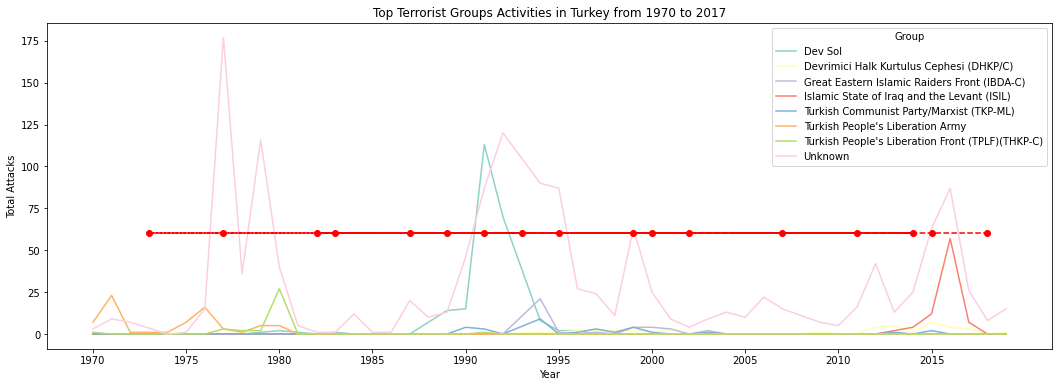

In [43]:
ir_groups_10 =df_turkey[df_turkey.Group.isin(df_turkey.Group.value_counts()[1:9].index)]
pd.crosstab(ir_groups_10.Year, ir_groups_10.Group).plot(color=sns.color_palette('Set3', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.plot(xpoints,y,'ro--')# plot x and y using red circle markers Election Years
plt.xticks(range(1970, 2020, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities in Turkey from 1970 to 2017')
plt.show()

I wanted to know the relationship between the elections and the increase in terrorist activities.
As far as I researched terrorism affects people's electoral choices.

So as we can see in the graph, increases are seen in election times.

# It is already proven; Terrorism is threat to every human. Say no to terrorism!

Yakın zamanda yaşadığımız talihsiz Taksim terör eylemini kınıyor, vefat edenlerin yakınlarına başsağlığı, yaralılara acil şifalar diliyorum.


Tekrarlanmaması dileğiyle..

Bensu GAYRET
